<a href="https://colab.research.google.com/github/erikhenzdias/PJCT-1/blob/main/complaints_company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
# drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
complaints_data = pd.read_csv('/content/gdrive/MyDrive/complaints.csv.zip', parse_dates=True)

In [ ]:
import numpy as np
import matplotlib.pyplot as py



In [ ]:
complaints_data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-04-14,Checking or savings account,Checking account,Problem with a lender or other company chargin...,Transaction was not authorized,NaN,Company believes the complaint provided an opp...,MoneyLion Inc.,GA,30032,NaN,NaN,Phone,2023-05-22,Closed with explanation,Yes,NaN,6840162
1,2023-05-16,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,Experian Information Solutions Inc.,NY,11235,NaN,NaN,Web,2023-05-16,In progress,Yes,NaN,6982904
2,2023-05-22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,IA,50316,NaN,NaN,Web,2023-05-22,In progress,Yes,NaN,7008228
3,2023-05-22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,Experian Information Solutions Inc.,OH,44130,NaN,NaN,Web,2023-05-22,In progress,Yes,NaN,7008174
4,2023-05-20,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,Company believes it acted appropriately as aut...,UNITED SERVICES AUTOMOBILE ASSOCIATION,TX,78240,Servicemember,Consent not provided,Web,2023-05-20,Closed with explanation,Yes,NaN,7004305


In [ ]:
complaints_data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [ ]:
complaints_features = ['Date sent to company']

In [ ]:
X = complaints_data[complaints_features]

In [ ]:
X.head()

,Date sent to company
0,2023-05-22
1,2023-05-16
2,2023-05-22
3,2023-05-22
4,2023-05-20


In [ ]:
X.describe()

,Date sent to company
count,3695120
unique,4147
top,2023-05-09
freq,4793


In [ ]:
value_counts = complaints_data['Company'].value_counts()
companyNames = value_counts.index.tolist()
companyNames.sort()
companyNames

['(Former)Shapiro, Swertfeger & Hasty, LLP',
 '1 Auto Finance, Inc.',
 '1 STOP MONEY CENTERS, LLC',
 '10 Cent Title Pawn Inc',
 '16 Hands LLC. dba Fiducius',
 '1803 Capital, LLC',
 '1ST 2ND MORTGAGE CO. OF NJ INC',
 '1ST ALLIANCE LENDING, LLC',
 '1ST CHOICE LOANS, LLC.',
 '1ST FINANCIAL, INC.',
 '1ST IBERIA CREDIT, INC.',
 '1ST PREFERENCE MORTGAGE CORP',
 '1ST RESULTS BILLINGS & COLLECTIONS, INC.',
 '1st Capital Finance of South Carolina, Inc.',
 '1st Capital Mortgage, LLC',
 '1st Fidelity Loan Servicing',
 '1st Florida Lending CORP',
 '1st Franklin Financial Corporation',
 '1st Maryland Mortgage Corporation',
 '1st Midwest Mortgage Corp',
 '1st Money Center, Inc., Hurst, TX Branch',
 '1st Portfolio Holding Corporation',
 '1st United Funding, LLC',
 '21ST MORTGAGE CORP.',
 '2233 Paradise Road LLC',
 '2288984 Ontario Inc.',
 '24 Asset Management Corp',
 '245 Holdings LLC',
 '360 Credit Consulting',
 '360 MORTGAGE GROUP LLC',
 '360 Mortgage Inc.',
 '391 Financial, Inc.',
 '3D Financial, 

**Every single company name present in the dataframe**

In [ ]:
complaints_data['Company'].value_counts()

EQUIFAX, INC.                                               679366
TRANSUNION INTERMEDIATE HOLDINGS, INC.                      589141
Experian Information Solutions Inc.                         549423
BANK OF AMERICA, NATIONAL ASSOCIATION                       126885
WELLS FARGO & COMPANY                                       115343
                                                             ...  
Financial Services of America                                    1
Hans Capital Group dba H&L Automotive Financial Services         1
Consider It Collected, LLC                                       1
World Wide Pay Day Advance, Inc                                  1
ENSURE HOME LOANS LLC                                            1
Name: Company, Length: 6763, dtype: int64

**Above you have the amount of times a complaint was lodged against a specific company and below you have the amount of unique values in the DF, meaning for example that there is  different companies**

In [ ]:
complaints_data.nunique()

Date received                      4198
Product                              18
Sub-product                          76
Issue                               165
Sub-issue                           221
Consumer complaint narrative    1149999
Company public response              11
Company                            6763
State                                63
ZIP code                          32876
Tags                                  3
Consumer consent provided?            4
Submitted via                         7
Date sent to company               4147
Company response to consumer          8
Timely response?                      2
Consumer disputed?                    2
Complaint ID                    3695120
dtype: int64

In [ ]:
pX = complaints_data['Product'].value_counts()
pX_top = pX.head(5)
pX_top


Credit reporting, credit repair services, or other personal consumer reports    1907729
Debt collection                                                                  486156
Mortgage                                                                         377887
Credit card or prepaid card                                                      190351
Checking or savings account                                                      167912
Name: Product, dtype: int64

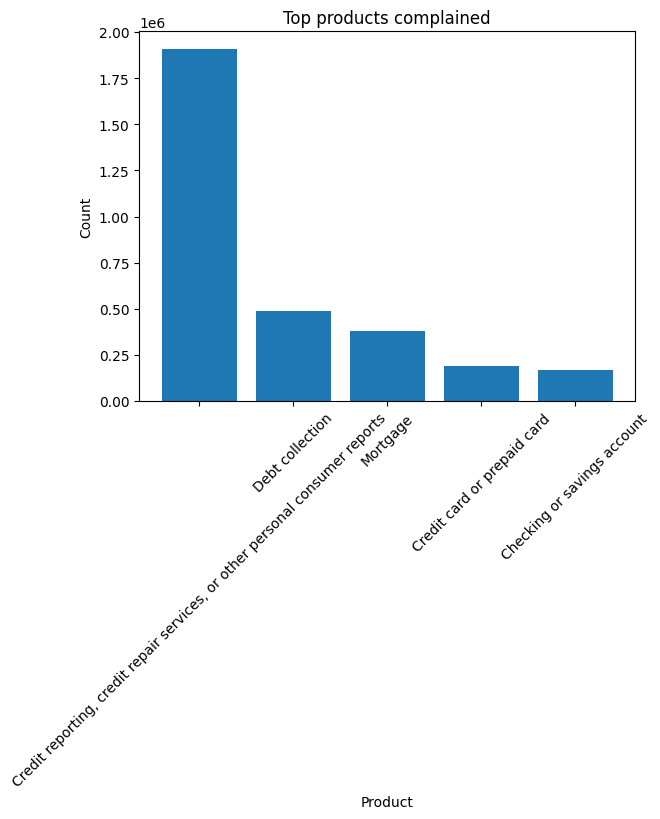

In [ ]:
pX = complaints_data['Product'].value_counts()
pX_top = pX.head(5)

# Assuming dX_top contains unique values for each day and the occurrence count
products = pX_top.index
counts = pX_top.values


# Plotting the top values
py.bar(products, counts, linestyle='-')
py.xlabel('Product')
py.ylabel('Count')
py.title('Top products complained')
py.xticks(rotation=45)
py.show()

x empresas y incidencias


In [ ]:
complaints_data["Date sent to company"].min(), complaints_data["Date sent to company"].max()

('2011-12-01', '2023-05-31')

.

.

In [ ]:
complaints_data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-04-14,Checking or savings account,Checking account,Problem with a lender or other company chargin...,Transaction was not authorized,NaN,Company believes the complaint provided an opp...,MoneyLion Inc.,GA,30032,NaN,NaN,Phone,2023-05-22,Closed with explanation,Yes,NaN,6840162
1,2023-05-16,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,Experian Information Solutions Inc.,NY,11235,NaN,NaN,Web,2023-05-16,In progress,Yes,NaN,6982904
2,2023-05-22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,IA,50316,NaN,NaN,Web,2023-05-22,In progress,Yes,NaN,7008228
3,2023-05-22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,Experian Information Solutions Inc.,OH,44130,NaN,NaN,Web,2023-05-22,In progress,Yes,NaN,7008174
4,2023-05-20,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,Company believes it acted appropriately as aut...,UNITED SERVICES AUTOMOBILE ASSOCIATION,TX,78240,Servicemember,Consent not provided,Web,2023-05-20,Closed with explanation,Yes,NaN,7004305


***TOP 10 COMPANIES AVERAGE AND SUCH THINGS*** ------------------------------------------------------------------------------------------------------------









In [ ]:
inf = complaints_data['Company'].value_counts()

In [ ]:
inf_comp = inf.head(10)

In [ ]:
infX = inf_comp 

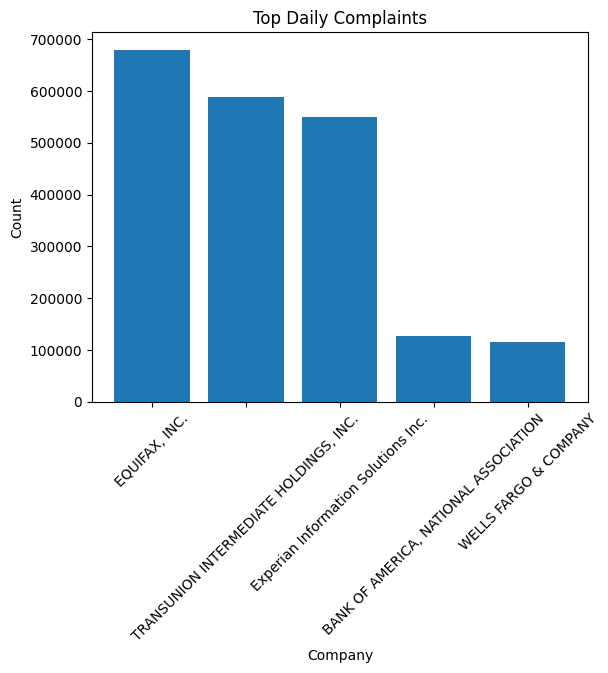

In [ ]:
infX_top = infX.head(5)

# Assuming dX_top contains unique values for each day and the occurrence count
companies = infX_top.index
counts = infX_top.values


# Plotting the top values
py.bar(companies, counts, linestyle='-')
py.xlabel('Company')
py.ylabel('Count')
py.title('Top Daily Complaints')
py.xticks(rotation=45)
py.show()

**Above you have the top5 companies with the most complaints lodged against them**



In [ ]:
inf_comp.mean()

241117.3

**On average, the top10 companies with the most complaints have received around 241.000 complaints.**

.

.

In [ ]:
dY = complaints_data.loc[complaints_data["Date sent to company"].between("2011-12-01", "2023-12-01")]
dY

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-04-14,Checking or savings account,Checking account,Problem with a lender or other company chargin...,Transaction was not authorized,NaN,Company believes the complaint provided an opp...,MoneyLion Inc.,GA,30032,NaN,NaN,Phone,2023-05-22,Closed with explanation,Yes,NaN,6840162
1,2023-05-16,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,Experian Information Solutions Inc.,NY,11235,NaN,NaN,Web,2023-05-16,In progress,Yes,NaN,6982904
2,2023-05-22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,IA,50316,NaN,NaN,Web,2023-05-22,In progress,Yes,NaN,7008228
3,2023-05-22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,Experian Information Solutions Inc.,OH,44130,NaN,NaN,Web,2023-05-22,In progress,Yes,NaN,7008174
4,2023-05-20,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,Company believes it acted appropriately as aut...,UNITED SERVICES AUTOMOBILE ASSOCIATION,TX,78240,Servicemember,Consent not provided,Web,2023-05-20,Closed with explanation,Yes,NaN,7004305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695115,2022-04-28,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",GA,30236,NaN,Consent not provided,Web,2022-04-28,Closed with explanation,Yes,NaN,5511837
3695116,2022-05-21,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,"Nelnet, Inc.",MD,21042,NaN,Consent not provided,Web,2022-05-21,Closed with explanation,Yes,NaN,5591467
3695117,2022-04-03,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",CA,92376,NaN,Consent not provided,Web,2022-04-03,Closed with explanation,Yes,NaN,5399630
3695118,2022-04-28,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Garcadia Financial LLC,IN,46112,NaN,Consent not provided,Web,2022-04-28,Closed with explanation,Yes,NaN,5509949


**AVERAGE OF COMPLAINTS FOR T10 COMPANIES FROM DECEMBER 2011 TO DECEMBER 2012** --------------------------------------------------------------------

In [ ]:
df11 = complaints_data.loc[complaints_data["Date sent to company"].between("2011-12-01", "2012-12-01")]
df11

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
4711,2012-03-21,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,JPMORGAN CHASE & CO.,KY,40229,NaN,NaN,Referral,2012-03-22,Closed with relief,Yes,No,39757
5314,2012-08-16,Student loan,Non-federal student loan,Repaying your loan,NaN,NaN,NaN,SLM CORPORATION,AL,35217,Older American,NaN,Web,2012-08-22,Closed with explanation,Yes,No,137137
6327,2012-06-15,Student loan,Non-federal student loan,Repaying your loan,NaN,NaN,NaN,"Navient Solutions, LLC.",IN,46366,NaN,NaN,Web,2012-06-15,Closed with monetary relief,Yes,No,101888
46544,2012-02-03,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,JPMORGAN CHASE & CO.,LA,71118,NaN,NaN,Web,2012-02-06,Closed without relief,Yes,Yes,20064
46650,2012-09-11,Credit card,NaN,Closing/Cancelling account,NaN,NaN,NaN,"CITIBANK, N.A.",CA,91304,"Older American, Servicemember",NaN,Phone,2012-09-12,Closed with explanation,Yes,No,149925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3694748,2012-09-07,Credit card,NaN,APR or interest rate,NaN,NaN,NaN,JPMORGAN CHASE & CO.,MS,38651,NaN,NaN,Web,2012-09-07,Closed with monetary relief,Yes,No,148543
3694749,2012-08-17,Credit card,NaN,Billing disputes,NaN,NaN,NaN,SYNCHRONY FINANCIAL,FL,33707,NaN,NaN,Web,2012-08-20,Closed with monetary relief,Yes,No,137257
3694794,2012-01-06,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,NATIONSTAR MORTGAGE LLC,MI,48134,NaN,NaN,Phone,2012-03-23,Closed without relief,Yes,No,10725
3694796,2012-04-05,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,JPMORGAN CHASE & CO.,TX,75230,NaN,NaN,Referral,2012-04-10,Closed without relief,Yes,No,39552


**Between 12.01.2011 and 12.01.2012 there was 67894 complaints**

In [ ]:
df11 #DataFrame with specific info for this time period

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
4711,2012-03-21,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,JPMORGAN CHASE & CO.,KY,40229,NaN,NaN,Referral,2012-03-22,Closed with relief,Yes,No,39757
5314,2012-08-16,Student loan,Non-federal student loan,Repaying your loan,NaN,NaN,NaN,SLM CORPORATION,AL,35217,Older American,NaN,Web,2012-08-22,Closed with explanation,Yes,No,137137
6327,2012-06-15,Student loan,Non-federal student loan,Repaying your loan,NaN,NaN,NaN,"Navient Solutions, LLC.",IN,46366,NaN,NaN,Web,2012-06-15,Closed with monetary relief,Yes,No,101888
46544,2012-02-03,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,JPMORGAN CHASE & CO.,LA,71118,NaN,NaN,Web,2012-02-06,Closed without relief,Yes,Yes,20064
46650,2012-09-11,Credit card,NaN,Closing/Cancelling account,NaN,NaN,NaN,"CITIBANK, N.A.",CA,91304,"Older American, Servicemember",NaN,Phone,2012-09-12,Closed with explanation,Yes,No,149925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3694748,2012-09-07,Credit card,NaN,APR or interest rate,NaN,NaN,NaN,JPMORGAN CHASE & CO.,MS,38651,NaN,NaN,Web,2012-09-07,Closed with monetary relief,Yes,No,148543
3694749,2012-08-17,Credit card,NaN,Billing disputes,NaN,NaN,NaN,SYNCHRONY FINANCIAL,FL,33707,NaN,NaN,Web,2012-08-20,Closed with monetary relief,Yes,No,137257
3694794,2012-01-06,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,NATIONSTAR MORTGAGE LLC,MI,48134,NaN,NaN,Phone,2012-03-23,Closed without relief,Yes,No,10725
3694796,2012-04-05,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,JPMORGAN CHASE & CO.,TX,75230,NaN,NaN,Referral,2012-04-10,Closed without relief,Yes,No,39552


In [ ]:
inf_2011 = df11['Company'].value_counts()

In [ ]:
inf2011_mean = inf_2011.head(10)
inf2011_mean

BANK OF AMERICA, NATIONAL ASSOCIATION    15405
WELLS FARGO & COMPANY                     8853
JPMORGAN CHASE & CO.                      7067
CITIBANK, N.A.                            5299
CAPITAL ONE FINANCIAL CORPORATION         3816
Ocwen Financial Corporation               3500
U.S. BANCORP                              1449
SYNCHRONY FINANCIAL                       1433
PNC Bank N.A.                             1281
HSBC NORTH AMERICA HOLDINGS INC.          1163
Name: Company, dtype: int64

In [ ]:
i11 = inf2011_mean.mean()

**On average 4926 complaints where lodged per company in the top10 with the most complaints.**

.

.

In [ ]:
df12 = complaints_data.loc[complaints_data["Date sent to company"].between("2012-12-01", "2013-12-01")]

In [ ]:
df12 #DataFrame with specific info for this time period

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
4867,2013-08-13,Student loan,Non-federal student loan,Repaying your loan,NaN,NaN,NaN,"Navient Solutions, LLC.",NY,11236,NaN,NaN,Web,2013-08-14,Closed with explanation,Yes,No,491428
4990,2013-06-15,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,JPMORGAN CHASE & CO.,DE,19802,NaN,NaN,Fax,2013-06-17,Closed with explanation,Yes,No,431000
5386,2013-06-11,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Experian Information Solutions Inc.,SC,29827,NaN,NaN,Postal mail,2013-07-16,Closed with explanation,Yes,No,429144
5447,2013-09-04,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,NATIONSTAR MORTGAGE LLC,AZ,85260,Older American,NaN,Phone,2013-09-05,Closed with explanation,Yes,No,514314
5448,2013-02-14,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Experian Information Solutions Inc.,AZ,85255,NaN,NaN,Web,2013-02-15,Closed with explanation,Yes,No,317040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3694856,2012-12-12,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,"EQUIFAX, INC.",NY,11355,NaN,NaN,Postal mail,2013-01-18,Closed with explanation,Yes,No,209482
3694859,2013-01-24,Credit reporting,NaN,Credit reporting company's investigation,No notice of investigation status/result,NaN,NaN,"EQUIFAX, INC.",GA,31313,Servicemember,NaN,Web,2013-01-24,Closed with non-monetary relief,Yes,No,259820
3694860,2013-07-18,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting report or credit score,NaN,NaN,"EQUIFAX, INC.",AR,71701,NaN,NaN,Web,2013-07-25,Closed with non-monetary relief,Yes,No,461335
3694861,2013-04-08,Credit reporting,NaN,Improper use of my credit report,Report improperly shared by CRC,NaN,NaN,"EQUIFAX, INC.",MO,64141,NaN,NaN,Web,2013-04-08,Closed with explanation,Yes,No,376183


In [ ]:
inf_2012 = df12['Company'].value_counts()

In [ ]:
inf2012_mean = inf_2012.head(10)
inf2012_mean

BANK OF AMERICA, NATIONAL ASSOCIATION     16849
WELLS FARGO & COMPANY                     11254
JPMORGAN CHASE & CO.                       7994
CITIBANK, N.A.                             5856
Experian Information Solutions Inc.        5023
Ocwen Financial Corporation                4683
EQUIFAX, INC.                              4501
TRANSUNION INTERMEDIATE HOLDINGS, INC.     3394
CAPITAL ONE FINANCIAL CORPORATION          3339
NATIONSTAR MORTGAGE LLC                    2972
Name: Company, dtype: int64

In [ ]:
i12 = inf2012_mean.mean()

**On average 6587 complaints where lodged per company in the top10 with the most complaints.**

.

.

In [ ]:
df13 = complaints_data.loc[complaints_data["Date sent to company"].between("2013-12-01", "2014-12-01")]

In [ ]:
df13 #DataFrame with specific info for this time period

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
4858,2014-01-14,Consumer Loan,Installment loan,Taking out the loan or lease,NaN,NaN,NaN,Delbert Services,WI,53704,NaN,NaN,Web,2014-01-16,Closed with explanation,Yes,No,667199
4868,2014-09-03,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,NaN,NaN,ERC,OH,45015,NaN,NaN,Web,2014-09-03,Closed with non-monetary relief,Yes,No,1012704
5373,2014-09-29,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Experian Information Solutions Inc.,TX,79404,NaN,NaN,Postal mail,2014-10-16,Closed with non-monetary relief,Yes,No,1050254
5387,2014-02-02,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting my free annual report,NaN,NaN,Experian Information Solutions Inc.,AZ,85015,NaN,NaN,Web,2014-02-02,Closed with explanation,Yes,No,695662
7639,2014-02-20,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,NaN,NaN,SYNCHRONY FINANCIAL,CA,95691,Older American,NaN,Phone,2014-02-20,Closed with explanation,Yes,No,722431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3694830,2014-02-26,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Experian Information Solutions Inc.,WA,99205,NaN,NaN,Web,2014-02-26,Closed with non-monetary relief,Yes,No,732084
3694847,2014-01-28,Credit reporting,NaN,Credit monitoring or identity protection,Problem cancelling or closing account,NaN,NaN,Experian Information Solutions Inc.,TX,75043,NaN,NaN,Web,2014-01-28,Closed with explanation,Yes,No,688921
3694862,2014-03-23,Credit reporting,NaN,Credit reporting company's investigation,Problem with statement of dispute,NaN,NaN,"EQUIFAX, INC.",FL,33009,NaN,NaN,Web,2014-03-23,Closed with explanation,Yes,No,773666
3695043,2014-06-04,Credit reporting,NaN,Incorrect information on credit report,Reinserted previously deleted info,NaN,NaN,"EQUIFAX, INC.",FL,33634,NaN,NaN,Web,2014-06-04,Closed with non-monetary relief,Yes,Yes,879840


In [ ]:
inf_2013 = df13['Company'].value_counts()

In [ ]:
inf2013_mean = inf_2013.head(10)
inf2013_mean

BANK OF AMERICA, NATIONAL ASSOCIATION     10326
Experian Information Solutions Inc.        9930
EQUIFAX, INC.                              9593
WELLS FARGO & COMPANY                      9258
JPMORGAN CHASE & CO.                       7759
TRANSUNION INTERMEDIATE HOLDINGS, INC.     7664
Ocwen Financial Corporation                6287
CITIBANK, N.A.                             5793
NATIONSTAR MORTGAGE LLC                    3993
CAPITAL ONE FINANCIAL CORPORATION          3372
Name: Company, dtype: int64

In [ ]:
i13 = inf2013_mean.mean()

**On average 7398 complaints where lodged per company in the top10 with the 
most complaints.**

.

.

In [ ]:
df14 = complaints_data.loc[complaints_data["Date sent to company"].between("2014-12-01", "2015-12-01")]

In [ ]:
df14 #DataFrame with specific info for this time period

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
4665,2015-05-20,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,JPMORGAN CHASE & CO.,WA,98042,NaN,Other,Web,2015-05-20,Closed with explanation,Yes,No,1385628
4712,2015-05-20,Debt collection,Federal student loan,Improper contact or sharing of info,Talked to a third party about my debt,NaN,NaN,"Navient Solutions, LLC.",NC,27103,NaN,NaN,Phone,2015-05-26,Closed with explanation,Yes,No,1384469
4957,2015-11-23,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting report or credit score,NaN,Company chooses not to provide a public response,Experian Information Solutions Inc.,PA,19104,NaN,Consent not provided,Web,2015-11-30,Closed with explanation,Yes,No,1668154
5967,2015-09-24,Credit reporting,NaN,Incorrect information on credit report,Account terms,NaN,Company chooses not to provide a public response,Experian Information Solutions Inc.,PA,18109,NaN,Consent not provided,Web,2015-09-24,Closed with non-monetary relief,Yes,No,1579559
6200,2015-01-04,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Experian Information Solutions Inc.,TX,77083,NaN,NaN,Web,2015-01-04,Closed with explanation,Yes,No,1179812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3694836,2015-08-04,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,"EQUIFAX, INC.",TN,37148,Older American,Consent not provided,Web,2015-08-27,Closed with explanation,Yes,No,1500827
3694844,2015-05-04,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,"Seterus, Inc.",OR,97219,NaN,Consent not provided,Web,2015-05-04,Closed with explanation,Yes,No,1358181
3694852,2015-09-30,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,Company chooses not to provide a public response,Experian Information Solutions Inc.,OK,74157,Older American,NaN,Referral,2015-10-15,Closed with explanation,Yes,No,1587649
3694854,2015-03-13,Payday loan,NaN,Charged fees or interest I didn't expect,NaN,NaN,NaN,Delbert Services,NJ,07726,NaN,NaN,Web,2015-03-13,Closed with explanation,Yes,No,1281651


In [ ]:
inf_2014 = df14['Company'].value_counts()

In [ ]:
inf2014_mean = inf_2014.head(10)
inf2014_mean

EQUIFAX, INC.                             11978
Experian Information Solutions Inc.       10842
TRANSUNION INTERMEDIATE HOLDINGS, INC.    10201
BANK OF AMERICA, NATIONAL ASSOCIATION      9958
WELLS FARGO & COMPANY                      9274
JPMORGAN CHASE & CO.                       7964
CITIBANK, N.A.                             6129
Ocwen Financial Corporation                5043
NATIONSTAR MORTGAGE LLC                    4143
CAPITAL ONE FINANCIAL CORPORATION          3654
Name: Company, dtype: int64

In [ ]:
i14 = inf2014_mean.mean()

**On average 7919 complaints where lodged per company in the top10 with the 
most complaints.**

.

.

In [ ]:
df15 = complaints_data.loc[complaints_data["Date sent to company"].between("2015-12-01", "2016-12-01")]

In [ ]:
df15 #DataFrame with specific info for this time period

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
4857,2016-08-31,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,Company has responded to the consumer and the ...,BB&T CORPORATION,FL,33180,NaN,Consent not provided,Web,2016-08-31,Closed with explanation,Yes,No,2088729
4900,2016-01-07,Credit card,NaN,Identity theft / Fraud / Embezzlement,NaN,NaN,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,77429,NaN,Consent not provided,Web,2016-01-07,Closed with explanation,Yes,No,1732253
4981,2016-08-01,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,IN,46037,NaN,NaN,Postal mail,2016-08-03,Closed with non-monetary relief,Yes,No,2041007
5176,2016-01-27,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,Company believes it acted appropriately as aut...,Ditech Financial LLC,VA,23452,Older American,NaN,Phone,2016-02-02,Closed with explanation,Yes,No,1760416
6188,2016-02-16,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,33983,NaN,NaN,Postal mail,2016-02-17,Closed with non-monetary relief,Yes,No,1789461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3694853,2016-02-16,Credit reporting,NaN,Credit reporting company's investigation,Problem with statement of dispute,NaN,NaN,"EQUIFAX, INC.",SC,29642,NaN,NaN,Phone,2016-02-17,Closed with explanation,Yes,No,1789717
3694855,2016-08-31,Credit reporting,NaN,Incorrect information on credit report,Personal information,NaN,NaN,"EQUIFAX, INC.",CA,93483,NaN,Consent not provided,Web,2016-08-31,Closed with explanation,Yes,No,2091182
3694858,2016-06-14,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,"EQUIFAX, INC.",NC,27944,NaN,NaN,Postal mail,2016-06-15,Closed with explanation,Yes,No,1968692
3694863,2016-06-04,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,"EQUIFAX, INC.",NY,10312,NaN,Consent not provided,Web,2016-06-04,Closed with explanation,Yes,No,1954541


In [ ]:
inf_2015 = df15['Company'].value_counts()

In [ ]:
inf2015_mean = inf_2015.head(10)
inf2015_mean

EQUIFAX, INC.                             15917
Experian Information Solutions Inc.       13874
TRANSUNION INTERMEDIATE HOLDINGS, INC.    12912
WELLS FARGO & COMPANY                     11007
BANK OF AMERICA, NATIONAL ASSOCIATION      9779
JPMORGAN CHASE & CO.                       8693
CITIBANK, N.A.                             8669
CAPITAL ONE FINANCIAL CORPORATION          4198
Ocwen Financial Corporation                3598
NATIONSTAR MORTGAGE LLC                    3275
Name: Company, dtype: int64

In [ ]:
i15 = inf2015_mean.mean()

**On average 9192 complaints where lodged per company in the top10 with the 
most complaints.**

.

.

In [ ]:
df16 = complaints_data.loc[complaints_data["Date sent to company"].between("2016-12-01", "2017-12-01")]

In [ ]:
df16 #DataFrame with specific info for this time period

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
4816,2017-02-09,Student loan,Federal student loan servicing,Dealing with my lender or servicer,Received bad information about my loan,NaN,NaN,"Navient Solutions, LLC.",CA,94043,NaN,Consent not provided,Web,2017-02-09,Closed with explanation,Yes,No,2336368
4849,2017-01-26,Student loan,Federal student loan servicing,Dealing with my lender or servicer,Keep getting calls about my loan,NaN,NaN,"Navient Solutions, LLC.",NY,14150,NaN,Consent not provided,Web,2017-01-26,Closed with explanation,Yes,No,2311436
4859,2017-01-19,Student loan,Federal student loan servicing,Dealing with my lender or servicer,Received bad information about my loan,NaN,NaN,"Navient Solutions, LLC.",NC,28215,NaN,Consent not provided,Web,2017-01-20,Closed with explanation,Yes,No,2296187
4860,2017-03-09,Student loan,Federal student loan servicing,Can't repay my loan,Can't get flexible payment options,NaN,NaN,"Navient Solutions, LLC.",TN,37208,NaN,Consent not provided,Web,2017-03-13,Closed with explanation,Yes,No,2379142
4869,2017-02-16,Student loan,Non-federal student loan,Dealing with my lender or servicer,Trouble with how payments are handled,NaN,NaN,"Navient Solutions, LLC.",NJ,07735,NaN,NaN,Fax,2017-02-22,Closed with explanation,Yes,No,2348361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3694272,2017-01-08,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,"EQUIFAX, INC.",TX,75011,NaN,Consent not provided,Web,2017-01-08,Closed with explanation,Yes,No,2279962
3694277,2017-01-23,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,NaN,NaN,"Populus Financial Group, Inc. (F/K/A Ace Cash ...",TX,79424,NaN,Consent not provided,Web,2017-01-23,Closed with explanation,Yes,No,2306748
3694354,2017-01-20,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,"EQUIFAX, INC.",LA,70301,NaN,NaN,Phone,2017-01-20,Closed with explanation,Yes,No,2299572
3694811,2016-12-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,TX,79404,NaN,Consent not provided,Web,2016-12-14,Closed with non-monetary relief,Yes,No,2249151


In [ ]:
inf_2016 = df16['Company'].value_counts()

In [ ]:
inf2016_mean = inf_2016.head(10)
inf2016_mean

EQUIFAX, INC.                             29951
TRANSUNION INTERMEDIATE HOLDINGS, INC.    21123
Experian Information Solutions Inc.       20755
Navient Solutions, LLC.                   11770
WELLS FARGO & COMPANY                      9448
BANK OF AMERICA, NATIONAL ASSOCIATION      8907
JPMORGAN CHASE & CO.                       8485
CITIBANK, N.A.                             7254
CAPITAL ONE FINANCIAL CORPORATION          5661
SYNCHRONY FINANCIAL                        3864
Name: Company, dtype: int64

In [ ]:
i16 = inf2016_mean.mean()

**On average 12722 complaints where lodged per company in the top10 with the 
most complaints.**

.

.

In [ ]:
df17 = complaints_data.loc[complaints_data["Date sent to company"].between("2017-12-01", "2018-12-01")]

In [ ]:
df17 #DataFrame with specific info for this time period

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
8268,2018-03-07,Mortgage,FHA mortgage,Struggling to pay mortgage,NaN,I filed a complaint with the CFPB on XX/XX/XXX...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,WA,98023,NaN,Consent provided,Web,2018-03-07,Closed with explanation,Yes,NaN,2835421
42358,2018-01-30,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,American Reporting Company,OR,97007,NaN,Consent not provided,Web,2018-01-30,Closed with explanation,No,NaN,2798861
106890,2018-03-20,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Card was charged for something you did not pur...,NaN,Company has responded to the consumer and the ...,Google Compare Credit Cards Inc.,CA,93637,NaN,NaN,Phone,2018-03-21,Closed with explanation,No,NaN,2848366
106907,2018-03-22,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,NaN,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,CA,91911,NaN,NaN,Postal mail,2018-03-22,Closed with non-monetary relief,Yes,NaN,2852218
106924,2017-11-27,"Payday loan, title loan, or personal loan",Payday loan,Charged fees or interest you didn't expect,NaN,NaN,NaN,Avant Credit Corporation,NaN,NaN,NaN,NaN,Phone,2017-12-06,Closed with explanation,Yes,NaN,2738197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3693333,2018-02-22,Checking or savings account,Checking account,Problem with a lender or other company chargin...,Transaction was not authorized,NaN,NaN,JPMORGAN CHASE & CO.,CA,94131,NaN,Consent not provided,Web,2018-02-22,Closed with monetary relief,Yes,NaN,2822491
3693334,2018-02-22,Checking or savings account,Other banking product or service,Managing an account,Problem making or receiving payments,NaN,Company has responded to the consumer and the ...,SYNCHRONY FINANCIAL,NaN,NaN,NaN,NaN,Referral,2018-02-22,Closed with monetary relief,Yes,NaN,2822884
3693336,2018-02-02,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",AL,35810,NaN,Consent not provided,Web,2018-02-02,Closed with explanation,Yes,NaN,2801864
3693343,2018-01-23,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,Company has responded to the consumer and the ...,SYNCHRONY FINANCIAL,FL,33301,NaN,Consent not provided,Web,2018-01-23,Closed with non-monetary relief,Yes,NaN,2790176


In [ ]:
inf_2017 = df17['Company'].value_counts()

In [ ]:
inf2017_mean = inf_2017.head(10)
inf2017_mean

Experian Information Solutions Inc.       29830
EQUIFAX, INC.                             29695
TRANSUNION INTERMEDIATE HOLDINGS, INC.    28136
JPMORGAN CHASE & CO.                       8917
WELLS FARGO & COMPANY                      8744
BANK OF AMERICA, NATIONAL ASSOCIATION      8588
CAPITAL ONE FINANCIAL CORPORATION          7702
CITIBANK, N.A.                             7215
Navient Solutions, LLC.                    5085
SYNCHRONY FINANCIAL                        4652
Name: Company, dtype: int64

In [ ]:
i17 = inf2017_mean.mean()

**On average 13856 complaints where lodged against each company in the top10 with the most complaints.**

.

.

In [ ]:
df18 = complaints_data.loc[complaints_data["Date sent to company"].between("2018-12-01", "2019-12-01")]

In [ ]:
df18 #DataFrame with specific info for this time period

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
77879,2019-02-14,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,Im opening this complaint because Im having an...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",VA,XXXXX,NaN,Consent provided,Web,2019-02-14,Closed with explanation,Yes,NaN,3152350
78006,2019-02-14,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Telephone payment made via XXXX Telephone Pay...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,XXXXX,NaN,Consent provided,Web,2019-02-14,Closed with explanation,Yes,NaN,3152372
78090,2019-02-14,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,credit Bureaus are inaccurately reporting my b...,NaN,"EQUIFAX, INC.",OR,97233,NaN,Consent provided,Web,2019-02-14,Closed with explanation,Yes,NaN,3152349
78154,2019-02-14,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,credit Bureaus are inaccurately reporting my b...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",OR,97233,NaN,Consent provided,Web,2019-02-14,Closed with explanation,Yes,NaN,3152347
78243,2019-02-14,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",OK,74014,NaN,Consent not provided,Web,2019-02-14,Closed with explanation,Yes,NaN,3152082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3676535,2019-08-28,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,"XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX TX, XX...",NaN,"EQUIFAX, INC.",AR,72401,NaN,Consent provided,Web,2019-08-28,Closed with non-monetary relief,Yes,NaN,3357194
3685250,2019-04-02,"Credit reporting, credit repair services, or o...",Credit reporting,Unable to get your credit report or credit score,Other problem getting your report or credit score,NaN,NaN,"EQUIFAX, INC.",CA,91602,NaN,NaN,Referral,2019-04-02,Closed with non-monetary relief,Yes,NaN,3198665
3687259,2019-04-03,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",NE,68516,NaN,Consent not provided,Web,2019-04-03,Closed with explanation,Yes,NaN,3199838
3687278,2019-03-25,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,"Managing, opening, or closing your mobile wall...",NaN,NaN,NaN,"Paypal Holdings, Inc",MI,49252,Older American,NaN,Phone,2019-03-25,Closed with explanation,Yes,NaN,3190468


In [ ]:
inf_2018 = df18['Company'].value_counts()

In [ ]:
inf2018_mean = inf_2018.head(10)
inf2018_mean

EQUIFAX, INC.                             40035
TRANSUNION INTERMEDIATE HOLDINGS, INC.    37868
Experian Information Solutions Inc.       36225
JPMORGAN CHASE & CO.                       8361
CAPITAL ONE FINANCIAL CORPORATION          7652
WELLS FARGO & COMPANY                      7567
BANK OF AMERICA, NATIONAL ASSOCIATION      7304
CITIBANK, N.A.                             7142
SYNCHRONY FINANCIAL                        4702
Navient Solutions, LLC.                    4020
Name: Company, dtype: int64

In [ ]:
i18 = inf2018_mean.mean()

**On average 16088 complaints where lodged against each company in the top10 with the most complaints.**

.

.

In [ ]:
df19 = complaints_data.loc[complaints_data["Date sent to company"].between("2019-12-01", "2020-12-01")]

In [ ]:
df19 #DataFrame with specific info for this time period

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
1398,2020-08-29,Mortgage,VA mortgage,Trouble during payment process,NaN,We are currently paying {$280.00} monthly into...,Company believes the complaint is the result o...,"Shellpoint Partners, LLC",OH,44137,"Older American, Servicemember",Consent provided,Web,2020-08-29,Closed with explanation,Yes,NaN,3820007
2733,2020-06-26,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,I opened the Citi AA advantage card to purchas...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",NC,27519,Servicemember,Consent provided,Web,2020-06-26,Closed with explanation,Yes,NaN,3716573
14461,2020-07-16,"Money transfer, virtual currency, or money ser...",Domestic (US) money transfer,Fraud or scam,NaN,"Hello, I filed a claim to Wellsfargo for fraud...",Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,GA,30605,NaN,Consent provided,Web,2020-07-16,Closed with explanation,Yes,NaN,3749171
106780,2020-11-02,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",LA,70607,NaN,Other,Web,2020-11-02,Closed with explanation,Yes,NaN,3932695
106781,2020-10-20,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Santander Consumer USA Holdings Inc.,TX,79707,NaN,Consent not provided,Web,2020-10-20,Closed with explanation,Yes,NaN,3907813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3693363,2020-03-07,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,"EQUIFAX, INC.",NY,11413,NaN,Consent not provided,Web,2020-03-07,Closed with explanation,Yes,NaN,3558464
3693372,2020-04-22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",TX,75071,NaN,Consent not provided,Web,2020-04-22,Closed with explanation,Yes,NaN,3618609
3693374,2020-07-27,Checking or savings account,Checking account,Managing an account,Cashing a check,NaN,Company has responded to the consumer and the ...,"Certegy Holdings, LLC",SC,29445,NaN,NaN,Postal mail,2020-07-27,Closed with explanation,Yes,NaN,3765220
3693436,2020-03-23,Mortgage,FHA mortgage,Struggling to pay mortgage,NaN,I refer to my earlier complaint # XXXX and the...,NaN,NATIONSTAR MORTGAGE LLC,FL,33755,Older American,Consent provided,Web,2020-03-23,Closed with explanation,Yes,NaN,3576533


In [ ]:
inf_2019 = df19['Company'].value_counts()

In [ ]:
inf2019_mean = inf_2019.head(10)
inf2019_mean

Experian Information Solutions Inc.       81492
TRANSUNION INTERMEDIATE HOLDINGS, INC.    78301
EQUIFAX, INC.                             72511
CAPITAL ONE FINANCIAL CORPORATION          9496
BANK OF AMERICA, NATIONAL ASSOCIATION      9115
JPMORGAN CHASE & CO.                       9007
CITIBANK, N.A.                             8480
WELLS FARGO & COMPANY                      7443
SYNCHRONY FINANCIAL                        4706
PNC Bank N.A.                              4078
Name: Company, dtype: int64

In [ ]:
i19 = inf2019_mean.mean()

In [ ]:
i19

28462.9

**On average 28463 complaints where lodged against each company in the top10 with the most complaints.**

.

.

In [ ]:
df20 = complaints_data.loc[complaints_data["Date sent to company"].between("2020-12-01", "2021-12-01")]

In [ ]:
df20 #DataFrame with specific info for this time period

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
2394,2021-09-06,"Credit reporting, credit repair services, or o...",Credit repair services,Confusing or misleading advertising or marketing,NaN,I received a flyer in the mail from XXXX XXXX ...,NaN,"Lakeview Law Group, PLLC",MO,64119,NaN,Consent provided,Web,2021-10-21,Closed with explanation,Yes,NaN,4695474
42357,2021-10-17,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,American Reporting Company,CA,92139,NaN,Consent not provided,Web,2021-10-17,Closed with explanation,No,NaN,4815815
48735,2021-10-10,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with fraud alerts or security freezes,NaN,This is not a duplicate. I am filing this beca...,NaN,"EQUIFAX, INC.",PA,XXXXX,NaN,Consent provided,Web,2021-10-10,Closed with explanation,Yes,NaN,4796975
48736,2021-09-21,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with fraud alerts or security freezes,NaN,I put a credit freeze and fraud alert on my ac...,NaN,"EQUIFAX, INC.",PA,XXXXX,NaN,Consent provided,Web,2021-09-21,Closed with explanation,Yes,NaN,4740182
48737,2021-02-24,Checking or savings account,Checking account,Managing an account,Problem accessing account,I have not been able to log in to my Fulton Ba...,Company has responded to the consumer and the ...,FULTON FINANCIAL CORPORATION,PA,XXXXX,NaN,Consent provided,Web,2021-02-24,Closed with explanation,Yes,NaN,4163446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3693144,2021-03-10,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,NaN,AFNI INC.,AR,72116,NaN,Consent not provided,Web,2021-03-10,Closed with explanation,Yes,NaN,4199905
3693145,2021-02-19,Checking or savings account,Other banking product or service,Managing an account,Problem using a debit or ATM card,NaN,NaN,DISCOVER BANK,NY,10030,NaN,NaN,Referral,2021-02-23,Closed with explanation,Yes,NaN,4160118
3693146,2021-06-28,Credit card or prepaid card,General-purpose credit card or charge card,"Advertising and marketing, including promotion...",Didn't receive advertised or promotional terms,NaN,NaN,ALLIANT CREDIT UNION,FL,34689,NaN,NaN,Referral,2021-06-29,Closed with monetary relief,Yes,NaN,4502517
3693147,2021-01-25,Credit card or prepaid card,General-purpose credit card or charge card,Fees or interest,Problem with fees,NaN,Company has responded to the consumer and the ...,"CITIBANK, N.A.",MD,21234,"Older American, Servicemember",NaN,Phone,2021-01-25,Closed with explanation,Yes,NaN,4091536


In [ ]:
inf_2020 = df20['Company'].value_counts()

In [ ]:
inf2020_mean = inf_2020.head(10)
inf2020_mean

EQUIFAX, INC.                             148223
TRANSUNION INTERMEDIATE HOLDINGS, INC.     66537
Experian Information Solutions Inc.        45405
CAPITAL ONE FINANCIAL CORPORATION          12446
BANK OF AMERICA, NATIONAL ASSOCIATION      11530
JPMORGAN CHASE & CO.                       10627
CITIBANK, N.A.                              9309
WELLS FARGO & COMPANY                       8859
Paypal Holdings, Inc                        5450
SYNCHRONY FINANCIAL                         5386
Name: Company, dtype: int64

In [ ]:
i20 = inf2020_mean.mean()

**On average 32377 complaints where lodged against each company in the top10 with the most complaints.**


.

.

In [ ]:
df21 = complaints_data.loc[complaints_data["Date sent to company"].between("2021-12-01", "2022-12-01")]

In [ ]:
df21 #DataFrame with specific info for this time period

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
4630,2022-11-23,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,Hi my name is XXXX XXXX XXXX XXXX and Im repor...,NaN,GOLDMAN SACHS BANK USA,NY,10036,NaN,Consent provided,Web,2022-11-23,Closed with explanation,Yes,NaN,6231926
5313,2022-11-23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,In according with the Fair Credit Reporting ac...,NaN,"EQUIFAX, INC.",TX,76039,NaN,Consent provided,Web,2022-11-23,Closed with explanation,Yes,NaN,6231817
5372,2022-11-23,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,NaN,Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11218,NaN,Consent not provided,Web,2022-11-23,Closed with explanation,Yes,NaN,6231684
5374,2022-11-23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"EQUIFAX, INC.",FL,34691,NaN,Consent not provided,Web,2022-11-23,Closed with explanation,Yes,NaN,6231812
5834,2022-11-23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"EQUIFAX, INC.",FL,33880,NaN,Consent not provided,Web,2022-11-23,Closed with explanation,Yes,NaN,6232085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695115,2022-04-28,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",GA,30236,NaN,Consent not provided,Web,2022-04-28,Closed with explanation,Yes,NaN,5511837
3695116,2022-05-21,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,"Nelnet, Inc.",MD,21042,NaN,Consent not provided,Web,2022-05-21,Closed with explanation,Yes,NaN,5591467
3695117,2022-04-03,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",CA,92376,NaN,Consent not provided,Web,2022-04-03,Closed with explanation,Yes,NaN,5399630
3695118,2022-04-28,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Garcadia Financial LLC,IN,46112,NaN,Consent not provided,Web,2022-04-28,Closed with explanation,Yes,NaN,5509949


In [ ]:
inf_2021 = df21['Company'].value_counts()

In [ ]:
inf2021_mean = inf_2021.head(10)
inf2021_mean

TRANSUNION INTERMEDIATE HOLDINGS, INC.    177094
EQUIFAX, INC.                             175248
Experian Information Solutions Inc.       165246
CAPITAL ONE FINANCIAL CORPORATION          13131
BANK OF AMERICA, NATIONAL ASSOCIATION      12889
JPMORGAN CHASE & CO.                       12095
WELLS FARGO & COMPANY                      10318
CITIBANK, N.A.                              8932
SYNCHRONY FINANCIAL                         5690
Bread Financial Holdings, Inc.              5076
Name: Company, dtype: int64

In [ ]:
i21 = inf2021_mean.mean()

In [ ]:
i21

58571.9

**On average 58572 complaints where lodged against each company in the top10 with the most complaints.**

.

.

In [ ]:
df22 = complaints_data.loc[complaints_data["Date sent to company"].between("2022-12-01", "2023-12-01")]

In [ ]:
df22 #DataFrame with specific info for this time period

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-04-14,Checking or savings account,Checking account,Problem with a lender or other company chargin...,Transaction was not authorized,NaN,Company believes the complaint provided an opp...,MoneyLion Inc.,GA,30032,NaN,NaN,Phone,2023-05-22,Closed with explanation,Yes,NaN,6840162
1,2023-05-16,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,Experian Information Solutions Inc.,NY,11235,NaN,NaN,Web,2023-05-16,In progress,Yes,NaN,6982904
2,2023-05-22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,IA,50316,NaN,NaN,Web,2023-05-22,In progress,Yes,NaN,7008228
3,2023-05-22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,Experian Information Solutions Inc.,OH,44130,NaN,NaN,Web,2023-05-22,In progress,Yes,NaN,7008174
4,2023-05-20,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,Company believes it acted appropriately as aut...,UNITED SERVICES AUTOMOBILE ASSOCIATION,TX,78240,Servicemember,Consent not provided,Web,2023-05-20,Closed with explanation,Yes,NaN,7004305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3693040,2023-01-20,Checking or savings account,Checking account,Problem caused by your funds being low,Overdrafts and overdraft fees,NaN,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,NC,28027,NaN,Consent not provided,Web,2023-01-20,Closed with explanation,Yes,NaN,6462314
3693041,2023-01-24,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,"I was constantly charged overdraft fees, even ...",Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,OK,741XX,Servicemember,Consent provided,Web,2023-03-07,Closed with explanation,Yes,NaN,6478943
3693050,2022-12-03,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,NaN,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,OH,44121,NaN,Consent not provided,Web,2022-12-03,Closed with explanation,Yes,NaN,6275337
3693126,2022-11-14,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,NaN,Company has responded to the consumer and the ...,"CITIBANK, N.A.",ME,04102,NaN,NaN,Phone,2022-12-08,Closed with monetary relief,Yes,NaN,6201483


In [ ]:
inf_2022 = df22['Company'].value_counts()

In [ ]:
inf2022_mean = inf_2022.head(10)
inf2022_mean

TRANSUNION INTERMEDIATE HOLDINGS, INC.    147808
EQUIFAX, INC.                             143523
Experian Information Solutions Inc.       132105
WELLS FARGO & COMPANY                      13583
CAPITAL ONE FINANCIAL CORPORATION           7690
BANK OF AMERICA, NATIONAL ASSOCIATION       6521
JPMORGAN CHASE & CO.                        6321
CITIBANK, N.A.                              4426
Bread Financial Holdings, Inc.              3424
SYNCHRONY FINANCIAL                         3193
Name: Company, dtype: int64

In [ ]:
i22 = inf2022_mean.mean()

**On average 46859 complaints where lodged against each company in the top10 with the most complaints.**

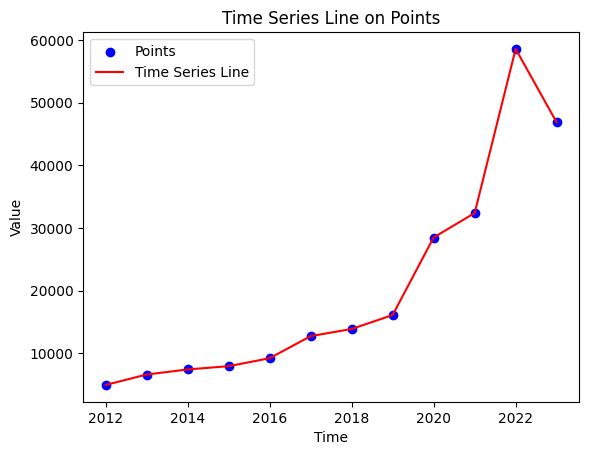

In [ ]:
comp_media = ["4926", "6587", "7398", "7919", "9192", "12722", "13856", "16088", "28462", "32377", "58571", "46859"]

# Convert values to numeric format
comp_media = pd.to_numeric(comp_media)

# Generate x-axis values as a time series
x_values = pd.date_range(start='2011-12-01', periods=len(comp_media), freq='Y')

# Plotting the points and time series line
py.scatter(x_values, comp_media, color='blue', label='Points')
py.plot(x_values, comp_media, color='red', label='Time Series Line')
py.xlabel('Time')
py.ylabel('Value')
py.title('Time Series Line on Points')
py.legend()
py.show()

In [ ]:
dX = complaints_data['Date sent to company'].value_counts()
dX_date = complaints_data.loc[complaints_data["Date sent to company"].between("2015-12-01", "2020-12-01")]


In [ ]:
dX_top = dX.head(10)
dX_top

NameError: ignored

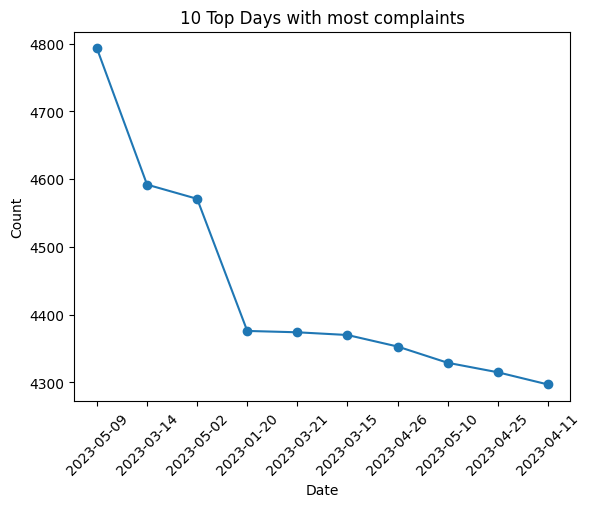

In [ ]:
# Assuming dX_top contains unique values for each day and the occurrence count
dates = dX_top.index
counts = dX_top.values


# Plotting the top values
py.plot(dates, counts, marker='o', linestyle='-')
py.xlabel('Date')
py.ylabel('Count')
py.title('10 Top Days with most complaints')
py.xticks(rotation=45)
py.show()